In [47]:

import pandas as pd
data = pd.read_csv("./Datasets/EastWestAirlines.csv")
data


,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935
...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403
3995,64385,0,981,5,0,0,1395
3996,73597,0,25447,8,0,0,1402
3997,54899,0,500,1,500,1,1401


In [48]:
# Checking for empties
data.isnull().sum()

Balance            0
QualMiles          0
BonusMiles         0
BonusTrans         0
FlightMiles        0
FlightTrans        0
DaysSinceEnroll    0
dtype: int64

In [49]:
# clustering
array=data.values
array

array([[28143,     0,   174, ...,     0,     0,  7000],
       [19244,     0,   215, ...,     0,     0,  6968],
       [41354,     0,  4123, ...,     0,     0,  7034],
       ...,
       [73597,     0, 25447, ...,     0,     0,  1402],
       [54899,     0,   500, ...,   500,     1,  1401],
       [ 3016,     0,     0, ...,     0,     0,  1398]])

In [50]:
data.describe

<bound method NDFrame.describe of       Balance  QualMiles  BonusMiles  BonusTrans  FlightMiles  FlightTrans  \
0       28143          0         174           1            0            0   
1       19244          0         215           2            0            0   
2       41354          0        4123           4            0            0   
3       14776          0         500           1            0            0   
4       97752          0       43300          26         2077            4   
...       ...        ...         ...         ...          ...          ...   
3994    18476          0        8525           4          200            1   
3995    64385          0         981           5            0            0   
3996    73597          0       25447           8            0            0   
3997    54899          0         500           1          500            1   
3998     3016          0           0           0            0            0   

      DaysSinceEnroll  
0    

In [51]:
x=array[0:3999,4:7]
x

array([[   0,    0, 7000],
       [   0,    0, 6968],
       [   0,    0, 7034],
       ...,
       [   0,    0, 1402],
       [ 500,    1, 1401],
       [   0,    0, 1398]])

In [55]:
from sklearn.cluster import KMeans as km
model=km(n_clusters=10,random_state=42)
model.fit(x)


KMeans(n_clusters=10, random_state=42)

In [56]:
means=model.cluster_centers_
means

array([[1.42759763e+02, 5.21893491e-01, 4.41364142e+03],
       [1.18298122e+02, 4.81220657e-01, 1.42554930e+03],
       [3.60705634e+03, 1.13521127e+01, 7.09961972e+03],
       [3.52392553e+03, 9.36170213e+00, 2.16682979e+03],
       [9.34292308e+03, 2.12051282e+01, 4.34425641e+03],
       [1.67841146e+02, 6.26302083e-01, 5.96066536e+03],
       [2.38625000e+03, 6.85833333e+00, 4.76521667e+03],
       [1.37670951e+02, 5.08997429e-01, 2.91344087e+03],
       [2.12418605e+02, 7.69767442e-01, 7.50550000e+03],
       [2.64585000e+04, 4.90000000e+01, 2.60200000e+03]])

In [58]:
# create a table for our groups
clusters=pd.DataFrame(means,columns=["FlightMiles","FlightTrans","DaysSinceEnroll"])
clusters

,FlightMiles,FlightTrans,DaysSinceEnroll
0,142.759763,0.521893,4413.641420
1,118.298122,0.481221,1425.549296
2,3607.056338,11.352113,7099.619718
3,3523.925532,9.361702,2166.829787
4,9342.923077,21.205128,4344.256410
5,167.841146,0.626302,5960.665365
6,2386.250000,6.858333,4765.216667
7,137.670951,0.508997,2913.440874
8,212.418605,0.769767,7505.500000
9,26458.500000,49.000000,2602.000000


In [59]:
# create a new column group_number
data["Group Number"]=model.labels_
data.head(15)

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,Group Number
0,28143,0,174,1,0,0,7000,8
1,19244,0,215,2,0,0,6968,8
2,41354,0,4123,4,0,0,7034,8
3,14776,0,500,1,0,0,6952,8
4,97752,0,43300,26,2077,4,6935,2
5,16420,0,0,0,0,0,6942,8
6,84914,0,27482,25,0,0,6994,8
7,20856,0,5250,4,250,1,6938,8
8,443003,0,1753,43,3850,12,6948,2
9,104860,0,28426,28,1150,3,6931,8


<AxesSubplot: xlabel='Group Number', ylabel='count'>

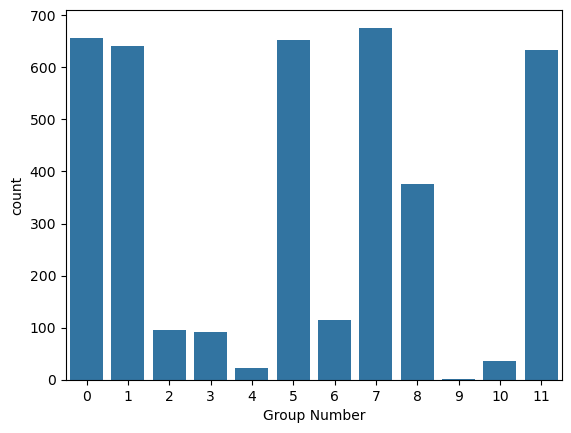

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=data["Group Number"])


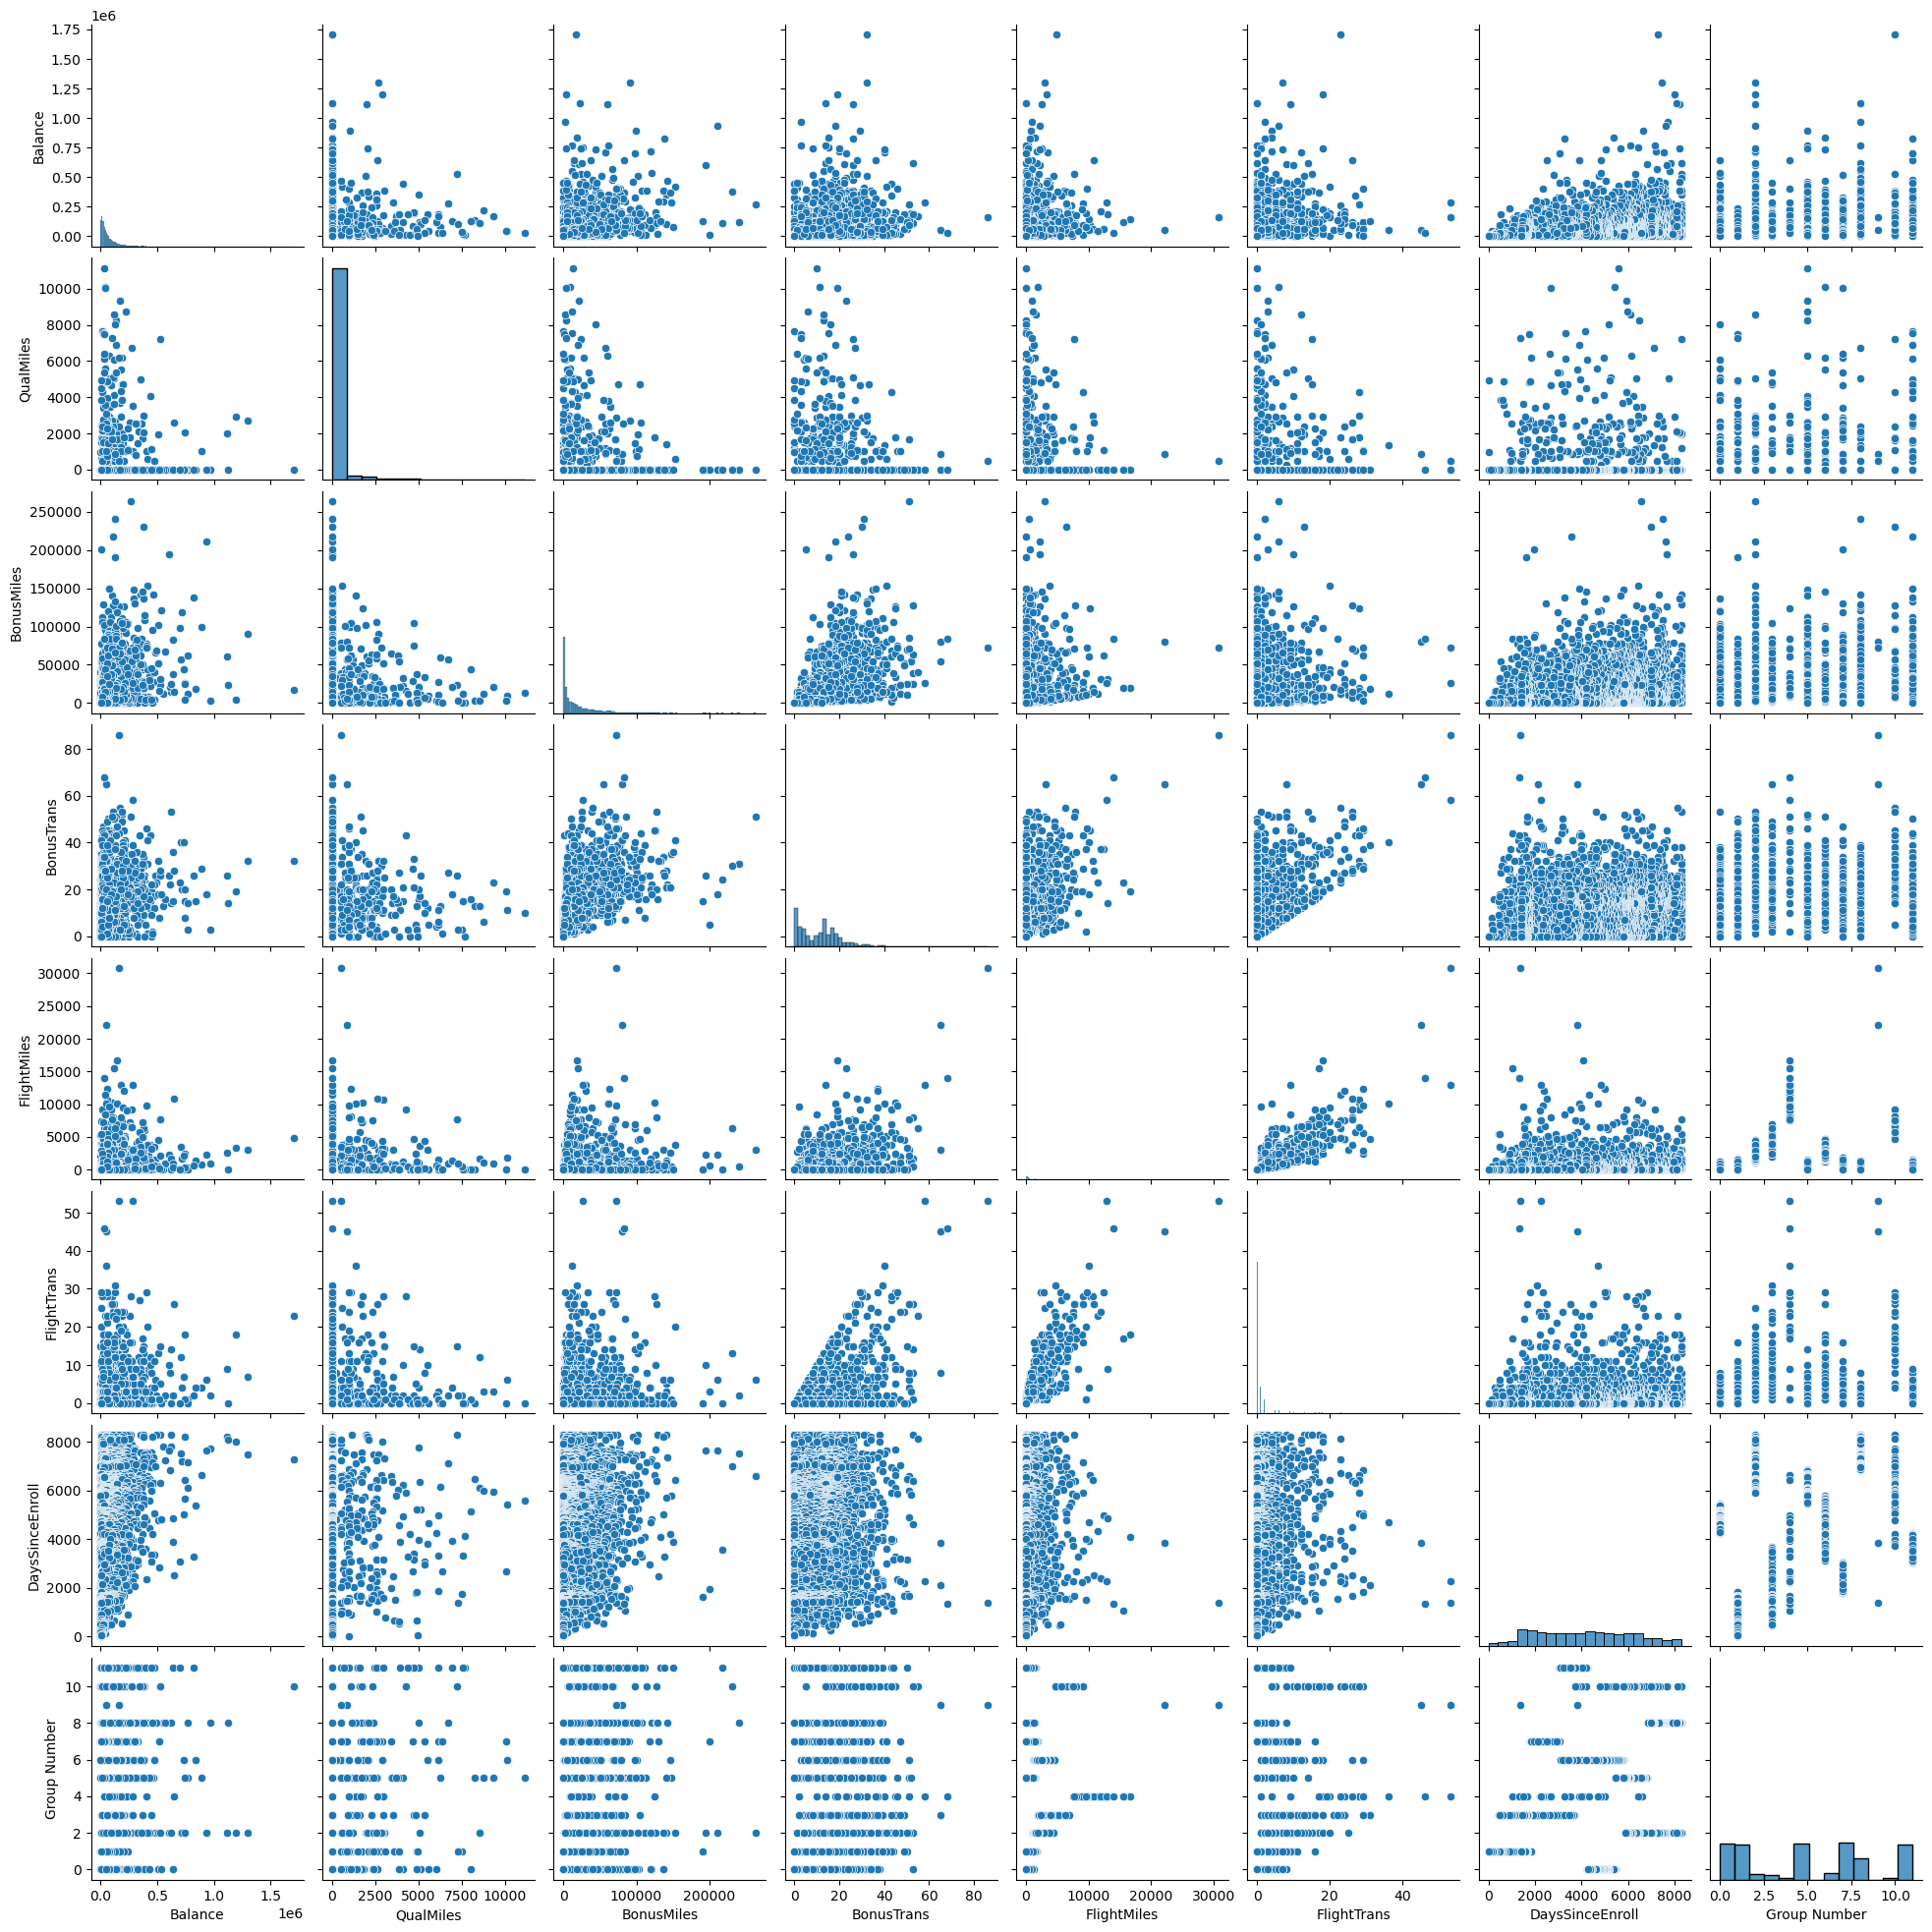

In [ ]:
sns.pairplot(data)

([0, 1, 2, 3, 4],
 [Text(0, 0, '0'),
  Text(1, 0, '250'),
  Text(2, 0, '1150'),
  Text(3, 0, '2077'),
  Text(4, 0, '3850')])

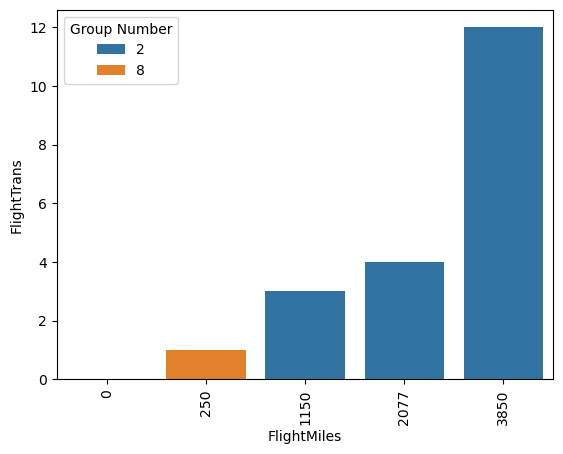

In [ ]:
sns.barplot(data=data.head(20),x="FlightMiles",y="FlightTrans",hue="Group Number",palette="tab10")
plt.xticks(rotation=90)

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000., 4500.]),
 [Text(-500.0, 0, '−500'),
  Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000'),
  Text(3500.0, 0, '3500'),
  Text(4000.0, 0, '4000'),
  Text(4500.0, 0, '4500')])

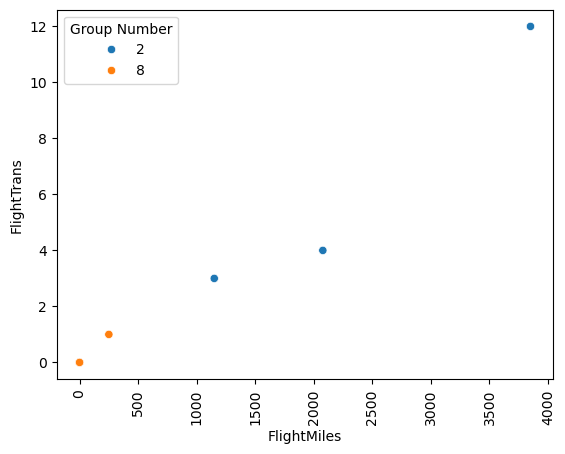

In [ ]:
sns.scatterplot(data=data.head(20),x="FlightMiles",y="FlightTrans",hue="Group Number",palette="tab10")
plt.xticks(rotation=90)

/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


([0, 1, 2, 3, 4],
 [Text(0, 0, '0'),
  Text(1, 0, '250'),
  Text(2, 0, '1150'),
  Text(3, 0, '2077'),
  Text(4, 0, '3850')])

/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


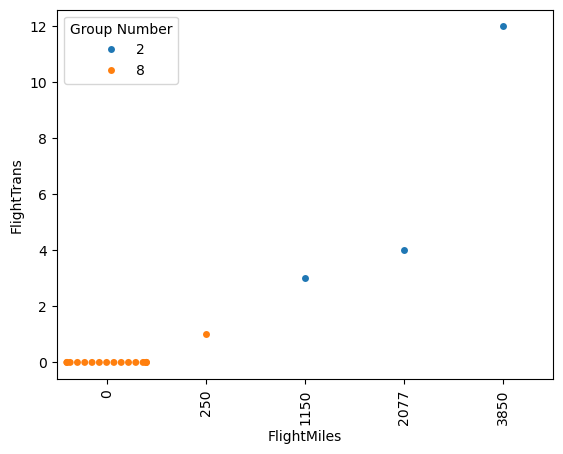

In [ ]:
sns.swarmplot(data=data.head(20),x="FlightMiles",y="FlightTrans",hue="Group Number",palette="tab10")
plt.xticks(rotation=90)